# 데이터 불러오기

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os

In [8]:
local_path = os.getcwd()
data_path = os.path.join(local_path + '/bike_sharing_data')

In [25]:
train = pd.read_csv(data_path+'/train.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [26]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['min'] = pd.DatetimeIndex(train['datetime']).minute
train['sec'] = pd.DatetimeIndex(train['datetime']).second
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [32]:
train['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

<AxesSubplot:ylabel='count'>

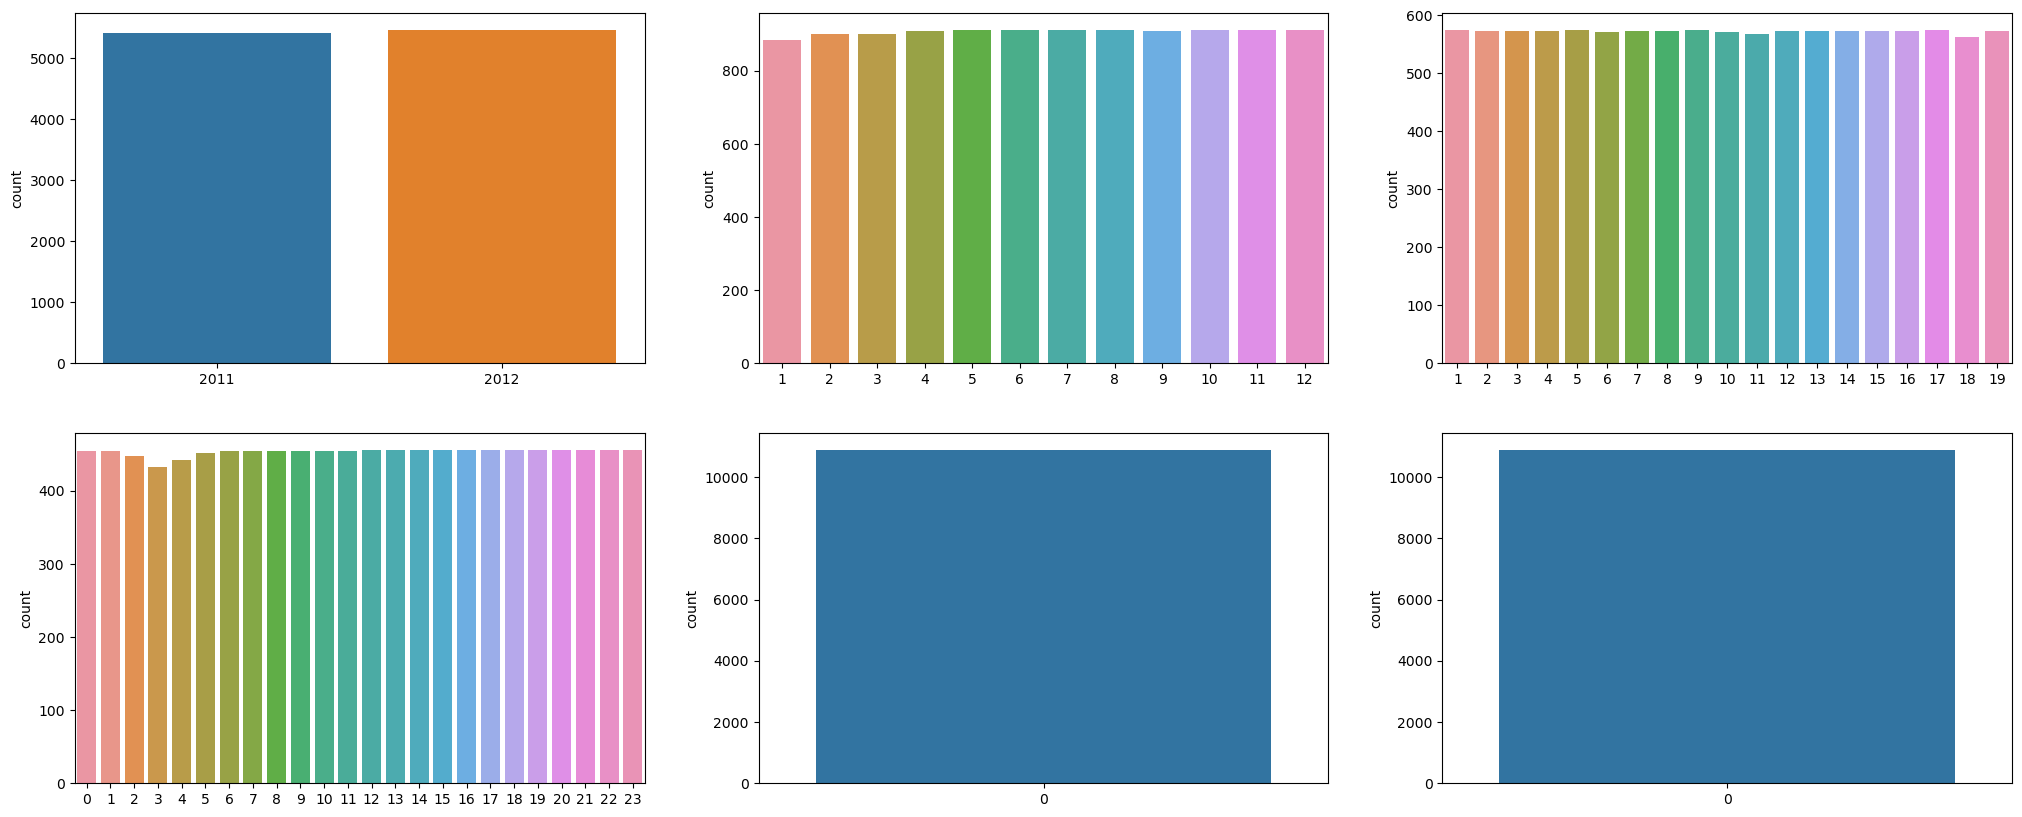

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(25,10))
sns.countplot(ax=axes[0][0], x=train['year'].values)
sns.countplot(ax=axes[0][1], x=train['month'].values)
sns.countplot(ax=axes[0][2], x=train['day'].values)
sns.countplot(ax=axes[1][0], x=train['hour'].values)
sns.countplot(ax=axes[1][1], x=train['min'].values)
sns.countplot(ax=axes[1][2], x=train['sec'].values)

In [71]:
train['year'] = pd.to_numeric(train['year'])
train['month'] = pd.to_numeric(train['month'])
train['day'] = pd.to_numeric(train['day'])
train['hour'] = pd.to_numeric(train['hour'])
train['min'] = pd.to_numeric(train['min'])
train['sec'] = pd.to_numeric(train['sec'])

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

In [72]:
train_X=train.drop(['count','casual','registered','datetime'], axis=1)
train_Y=train['count']

x.shape, y.shape

((10886, 15), (10886,))

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, 
                                                    train_Y, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [84]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([251.54734636, 193.55858321, 196.56101234, ..., 150.15364662,
        73.5937478 , 173.50343559])

In [85]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

19585.597692139734

In [87]:
rmse = mean_squared_error(y_test, predictions)**0.5
rmse

139.9485537336479

# 여기까지 밖에 못했습니다.!!